# 🐸 파이썬으로 데이터 주무르기 

## NetworkX: Network Analysis with Python

일자: 2020-07-04~ 

### 1. Introduction to NetworkX
#### network analysis

Vast amounts of network data are being generated and collected 
-  Sociology: web pages, mobile phones, social networks
-  Technology: Internet routers, vehicular flows, power grids

#### official website - [NetworkX Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

#### A basic example

1. Generate a graph using networkx
2. Draw the graph
3. Save the drawing graph

In [61]:
!pip install networkx

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
g = nx.Graph()
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=1.5)
g.add_edge('a','c',weight=1.0)
g.add_edge('c','d',weight=2.2)

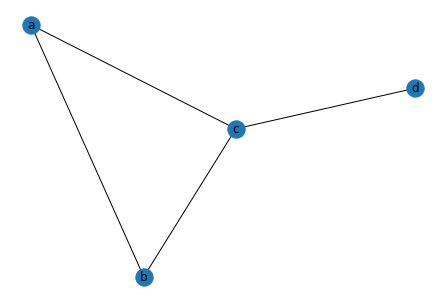

In [17]:
# 그림을 그려라! 
nx.draw(g, with_labels = True)
# plt.savefig('exampl.png') - 이미지 저장

### 2. Getting started with Python and NetworkX

#### Layout of a graph

![layouts](https://frhyme.github.io/assets/images/markdown_img/180807_nx_layout_comp.svg)

In [18]:
g = nx.Graph()

In [19]:
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(6,7)
g.add_edge(1,4)
g.add_edge(1,5)
g.add_edge(2,4)
g.add_edge(4,7)
g.add_edge(4,8)

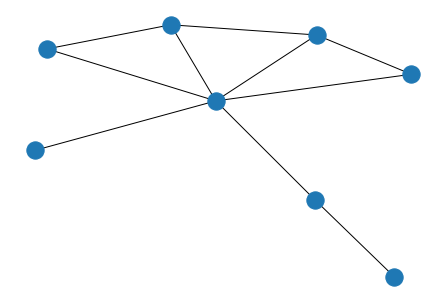

In [20]:
nx.draw(g)

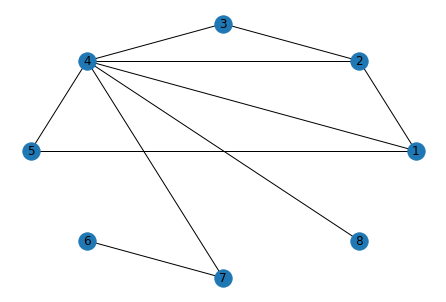

In [23]:
# a circular layout 
nx.draw_circular(g, with_labels = True)

In [24]:
# clearing the current plot 깨끗하게 지우기! 
plt.clf()

<Figure size 432x288 with 0 Axes>

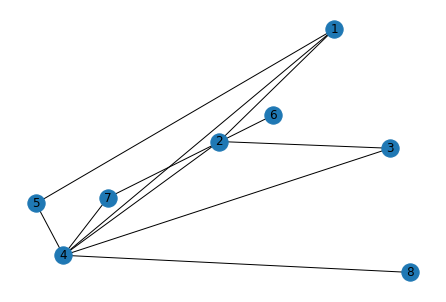

In [25]:
# Draw the graph G with a random layout.
nx.draw_random(g,with_labels=True)

In [26]:
plt.clf()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


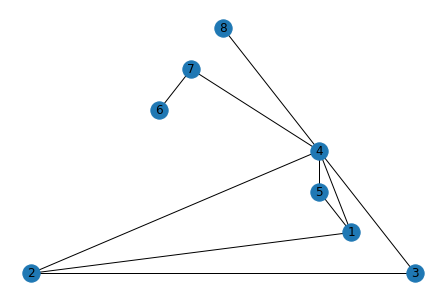

In [27]:
# planar layout 
nx.draw_planar(g, with_labels = True)

In [28]:
plt.clf()

<Figure size 432x288 with 0 Axes>

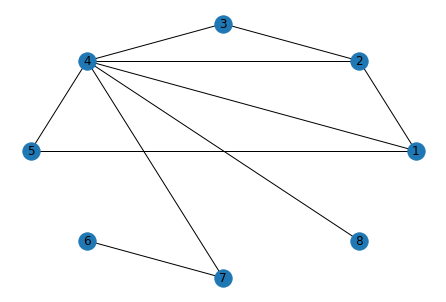

In [29]:
# shell layout 
nx.draw_shell(g, with_labels = True)

In [30]:
plt.clf()

<Figure size 432x288 with 0 Axes>

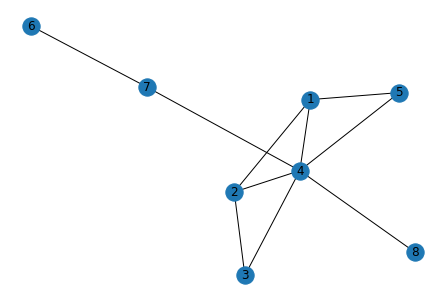

In [31]:
# spring layout 
nx.draw_spring(g, with_labels=True)

#### Using the pre-built graph

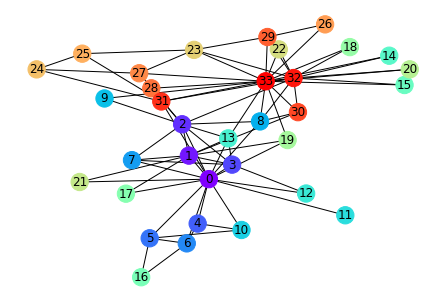

In [48]:
# Load the graph - 내장된 노드 데이터 
g = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(g)
# Plot the graph
nx.draw(g, node_color=range(34), node_size=300, 
        cmap=plt.get_cmap('rainbow'),
        with_labels=True, pos=pos)

In [45]:
# 얼마만큼 연결되어 있는지 알려주는 지표 
g.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [50]:
# Isolate the sequence of degrees - 따로 떨어뜨려주기
degree_sequence = list(g.degree())
degree_sequence[:5]

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3)]

In [51]:
# 노드 수
nb_nodes = 34
# 연결선 수
nb_arr = len(g.edges())
# np.array로 바꾸어줘야 넘파이 연산 가능, 오른쪽 기준 계산
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [52]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


### 3. Case study with Facebook data

csv 파일을 코드로 열기 전에 직접 파일을 열어 어떻게 데이터가 구성되어 있는지 확인해보세요. 저런 방식으로 데이터들을 만들 수 있습니다.

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('facebook_combined.txt')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
0 1    88233 non-null object
dtypes: object(1)
memory usage: 689.4+ KB


In [66]:
df.head()

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


In [67]:
g = nx.read_edgelist('facebook_combined.txt', 
                     create_using=nx.Graph(),
                    nodetype=int)

In [69]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


데이터가 커서 시간이 많이 걸려요ㅎㅎ 제 컴퓨터로 2-3분 소요됩니다!

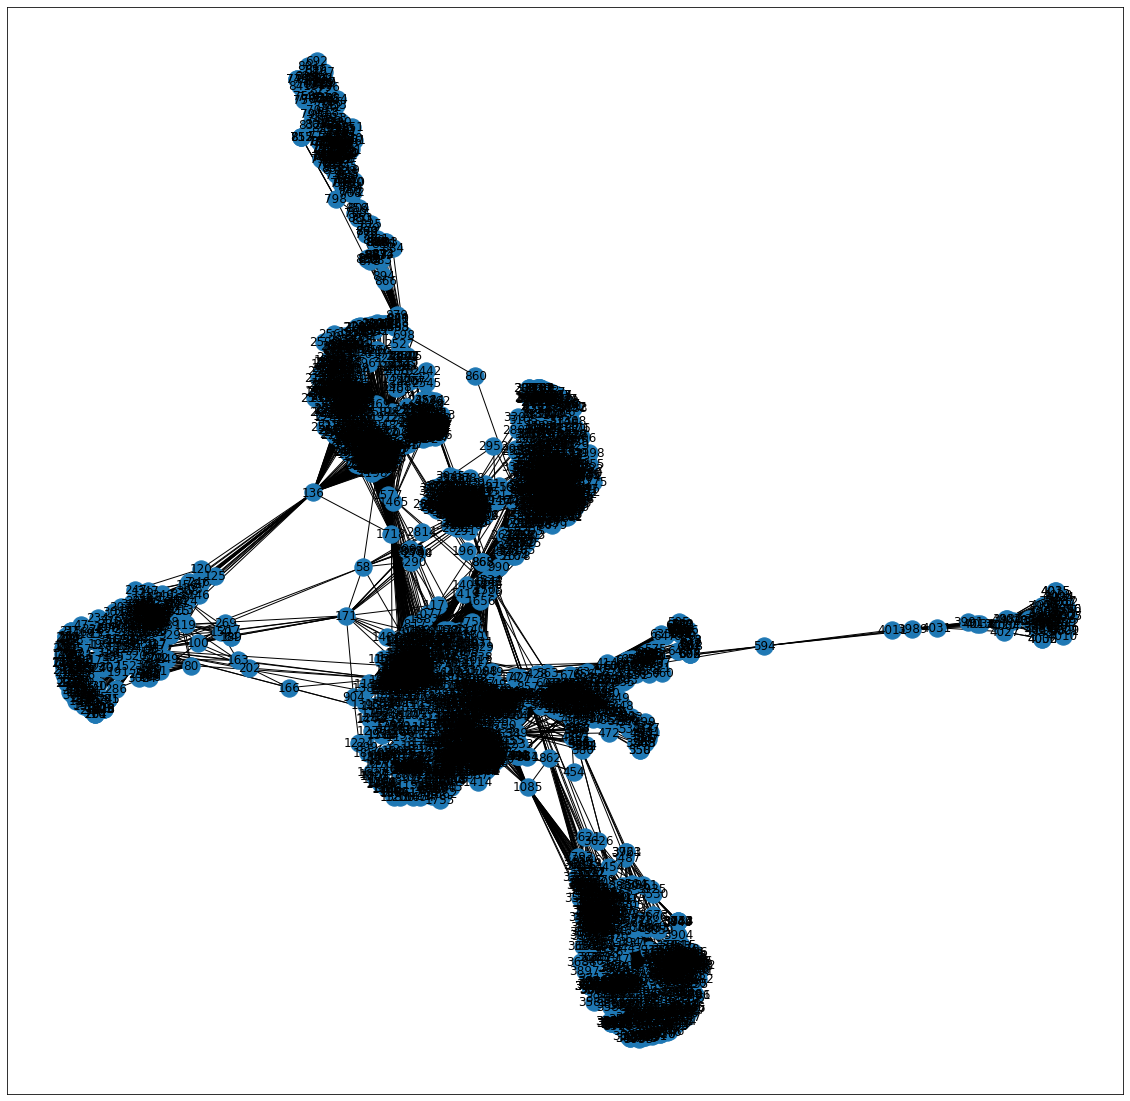

In [70]:
plt.figure(figsize=(20,20))
nx.draw_networkx(g)

많이 징그럽죠,,,ㅋㅋ 이 데이터에서 중심부를 찾아볼게요. 

- betweenness centrality를 사용: [네트워크의 모든 노드 쌍 간의 shortest path가 해당 노드를 지나는지 고려한 centrality](https://frhyme.github.io/python-lib/network-centrality/)
- [normalized / endpoints 설명](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)

In [ ]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, 
                                   endpoints=True)
node_color = [2000.0 * g.degree(v) for v in g]
node_size = [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                node_color=node_color,
                node_size=node_size)
plt.axis('off')